In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dftv = pd.read_csv('../data/Traffic_Violations_short.csv')
dftv.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 'columns',inplace = True)

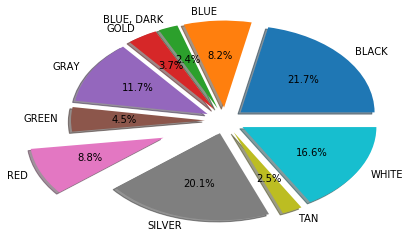

'Disproved that red cars are involved in more car violations than\nany other car color.'

In [32]:
#concept 1

dfcarsagg = dftv.groupby('Color').Accident.count() #counting all the accidents cars were involved in
dfcarsagg = dfcarsagg[dfcarsagg > 20000] #only selecting those more than 20,000 for illustrative purposes
labels = list(dfcarsagg.index)
explode = []
for i in labels:
    if (i == 'RED'):
        explode.append(.5)   #making red's slice stand out
    else:
        explode.append(0.15)  #setting the 'explode' to each slice
        
plt.figure()
plt.pie(dfcarsagg,labels=labels,
       autopct = '%1.1f%%',
        explode = explode,shadow = True,)
fontop = {'size':85}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(40,40))
plt.rc('font',**fontop)
plt.show()

"""Disproved that red cars are involved in more car violations than
any other car color."""

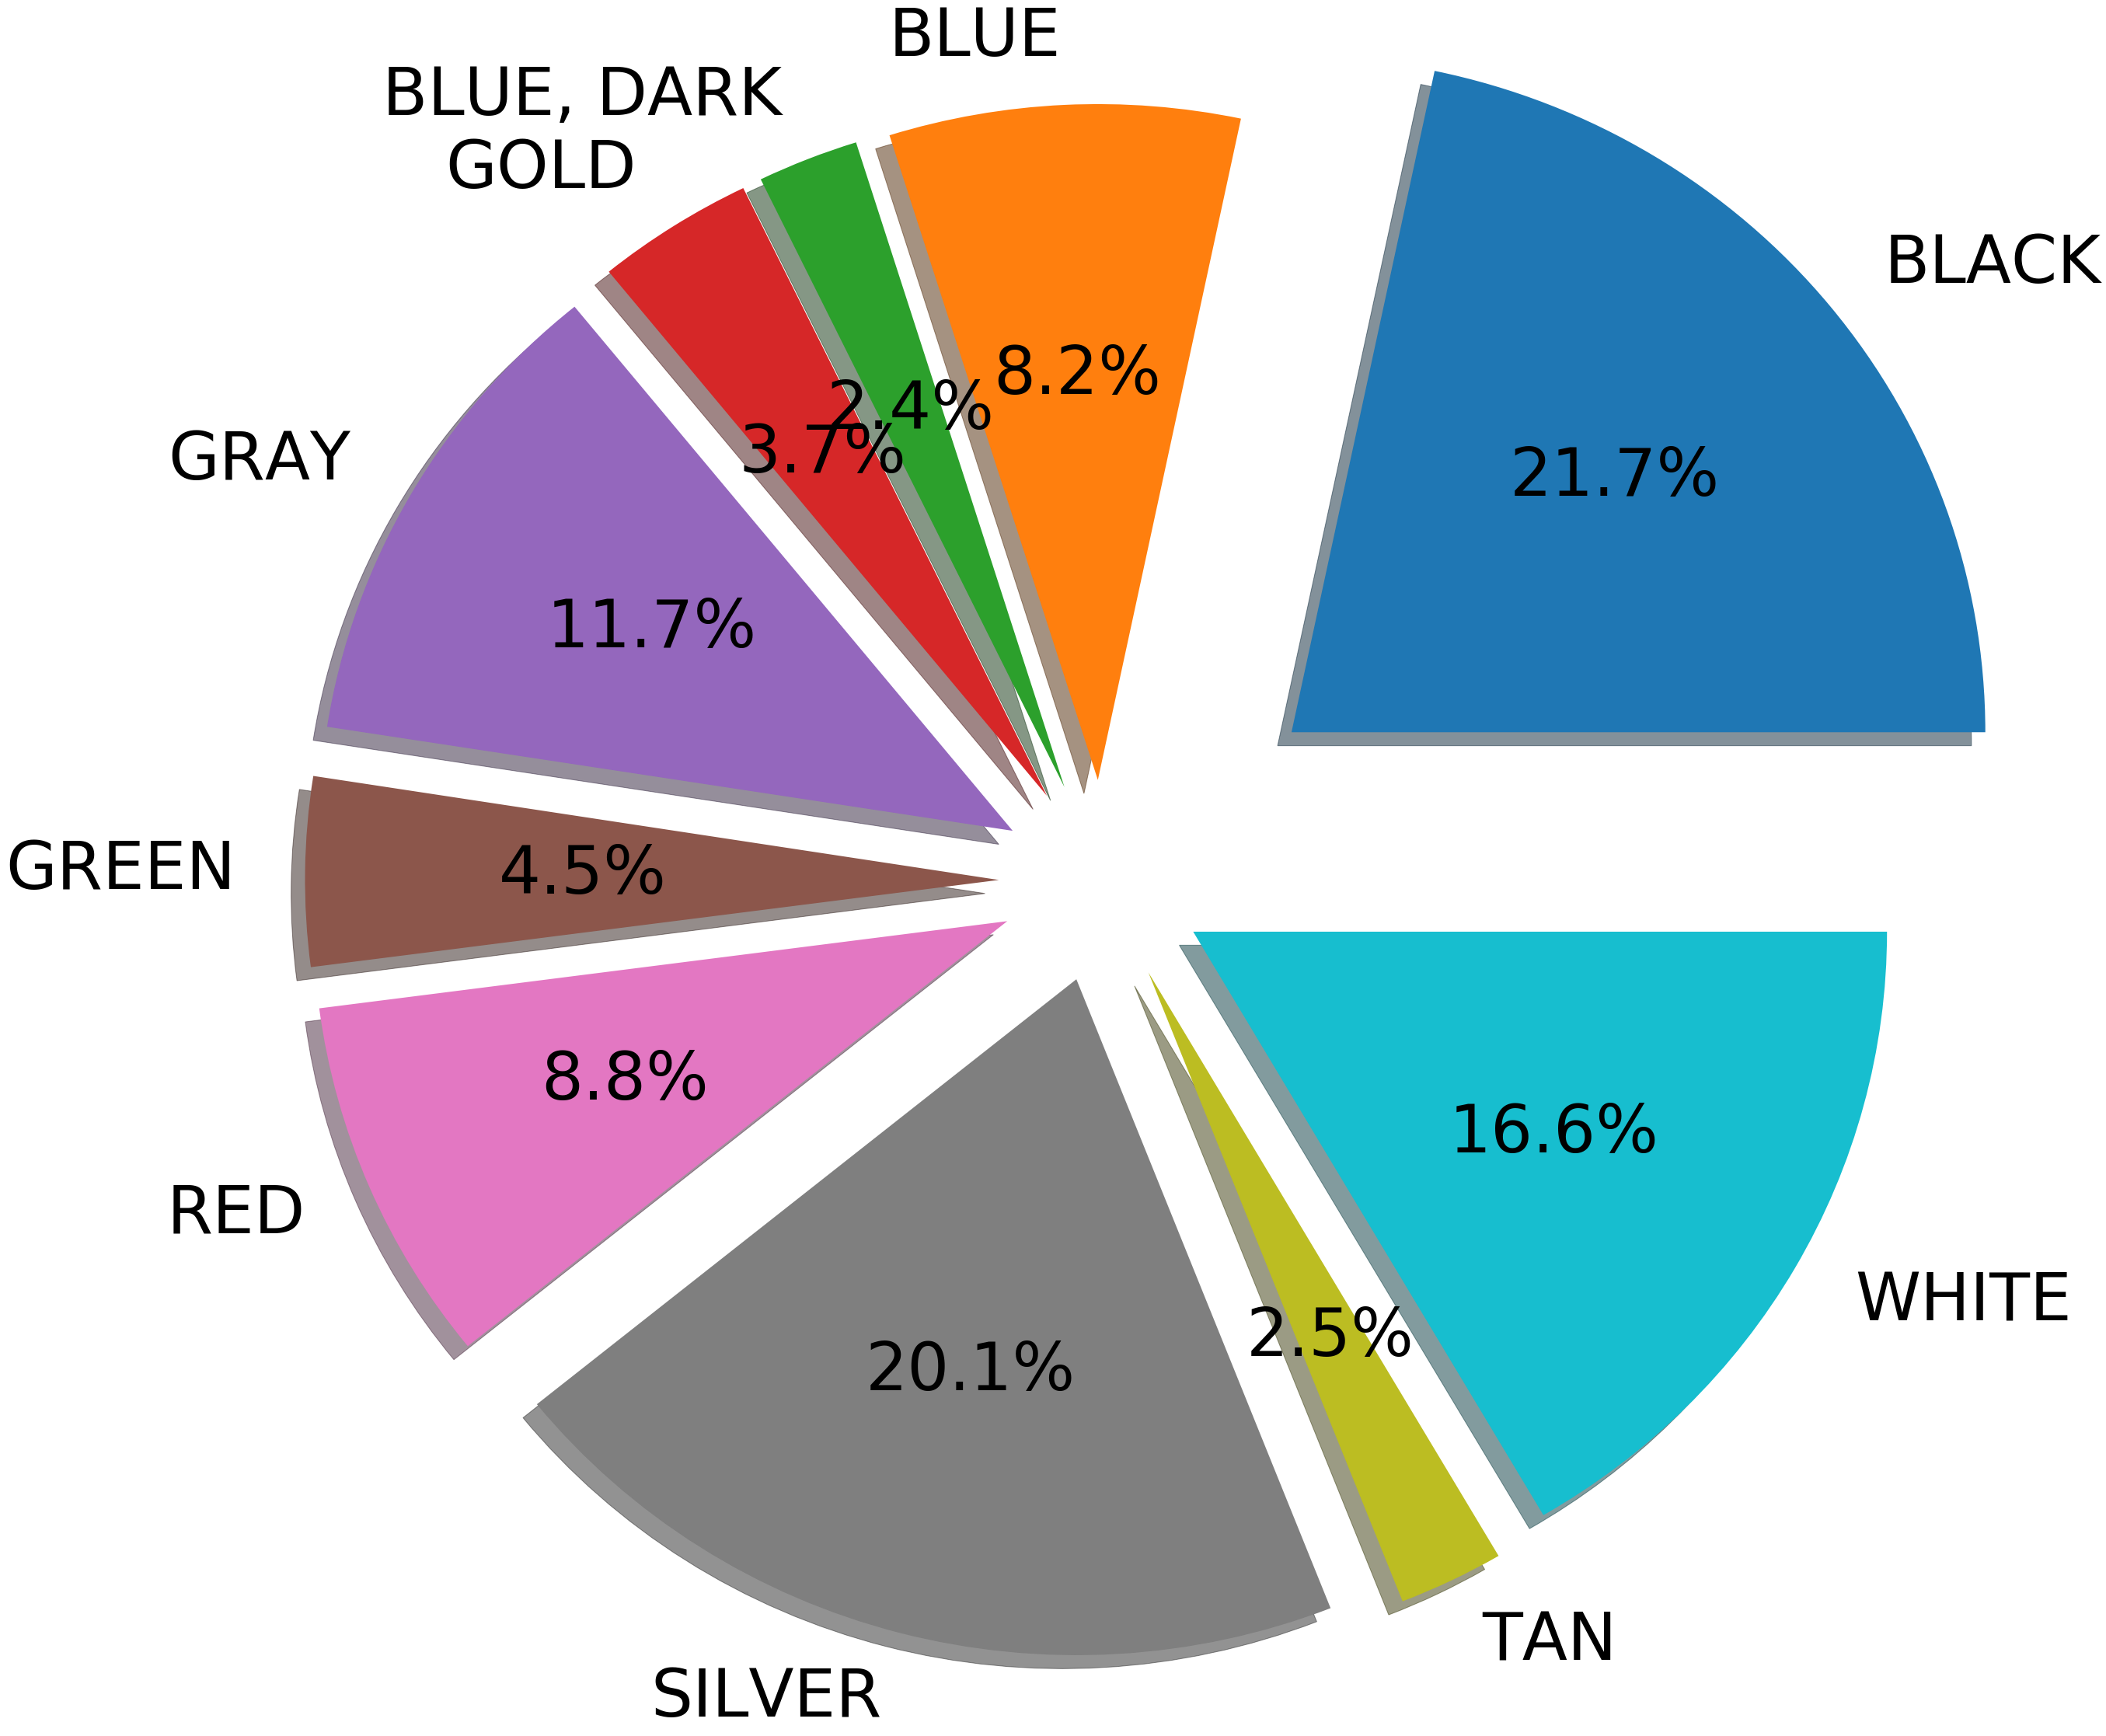

'Most cars are found to be black. Silver and white are close seconds.'

In [33]:
#second part of concept 1

list(dftv)
dfcarcolor = dftv.groupby('Color').Model.count()
dfcarcolor = dfcarcolor[dfcarcolor > 20000]  #shrinking the dataset those only greater than 20,000

labels = list(dfcarcolor.index)
explode = []
for i in labels:
    if (i == 'BLACK'):
        explode.append(.35)   #making black's slice stand out
    else:
        explode.append(0.15)  #setting the 'explode' to each slice
        
plt.figure()
plt.pie(dfcarcolor,labels=labels,
       autopct = '%1.1f%%',
        explode = explode,shadow = True,)
fontop = {'size':85}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(40,40))
plt.rc('font',**fontop)
plt.show()

'''Most cars are found to be black. Silver and white are close seconds.'''

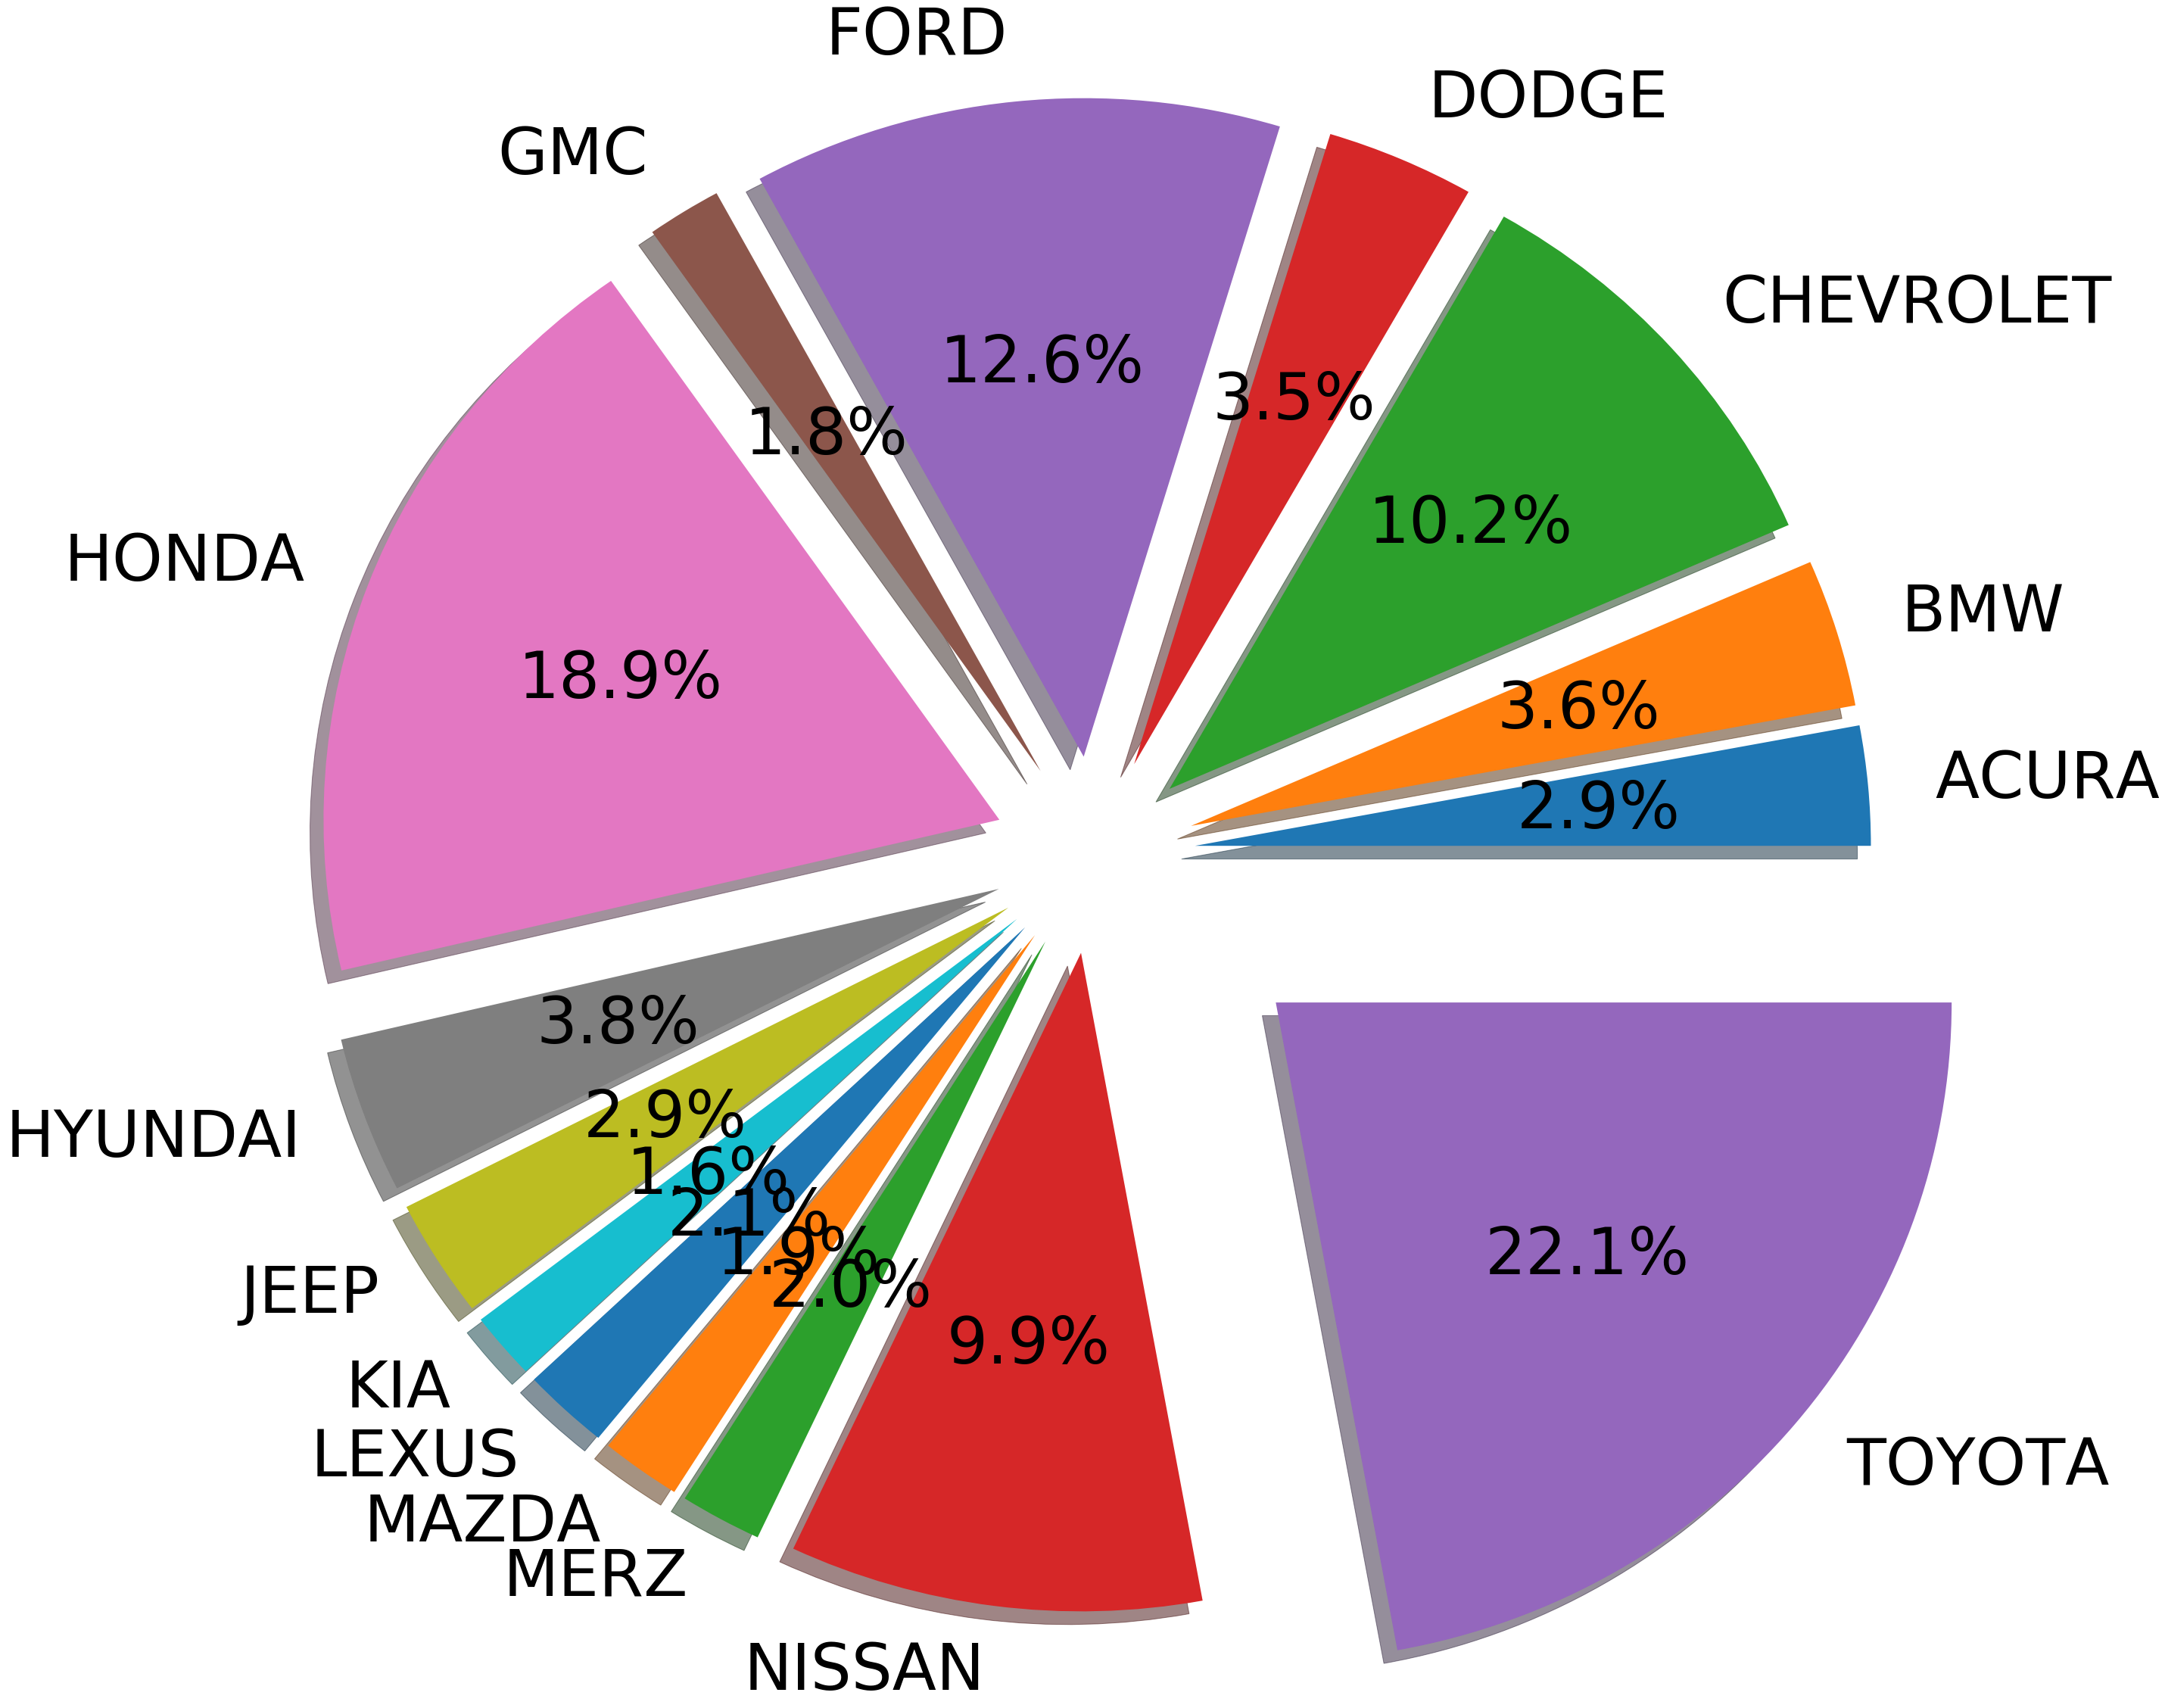

'Toyota is involved in the most violations. '

In [34]:
#concept 2

dfcarmake = dftv['Accident'].groupby(dftv['Make']).count()
list(dftv)
dfcarmake = dfcarmake[dfcarmake > 10000]
dfcarmake['CHEVROLET'] += dfcarmake['CHEV'] + dfcarmake['CHEVY']  #adding up all similar car makes that were put in the original
dfcarmake['HONDA'] += dfcarmake['HOND']                         #data set but wouldn't be counted as the same unless
dfcarmake['HYUNDAI'] += dfcarmake['HYUN']                       #they were added here
dfcarmake['TOYOTA'] += dfcarmake['TOYT']
dfcarmake['NISSAN'] += dfcarmake['NISS']
dfcarmake.drop('NISS',inplace = True)  #dropping useless information
dfcarmake.drop('HOND',inplace = True)  #""
dfcarmake.drop('CHEV',inplace = True)  #and so forth
dfcarmake.drop('CHEVY',inplace = True)
dfcarmake.drop('TOYT',inplace = True)
dfcarmake.drop('HYUN',inplace = True)

labels = list(dfcarmake.index)
explode = []
for i in labels:
    if (i == 'TOYOTA'):
        explode.append(.35)   #making red's slice stand out
    else:
        explode.append(0.15)  #setting the 'explode' to each slice
        
plt.figure()
plt.pie(dfcarmake,labels=labels,
       autopct = '%1.1f%%',
        explode = explode,shadow = True,)
fontop = {'size':85}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(40,40))
plt.rc('font',**fontop)
plt.show()

'''Toyota is involved in the most violations. '''

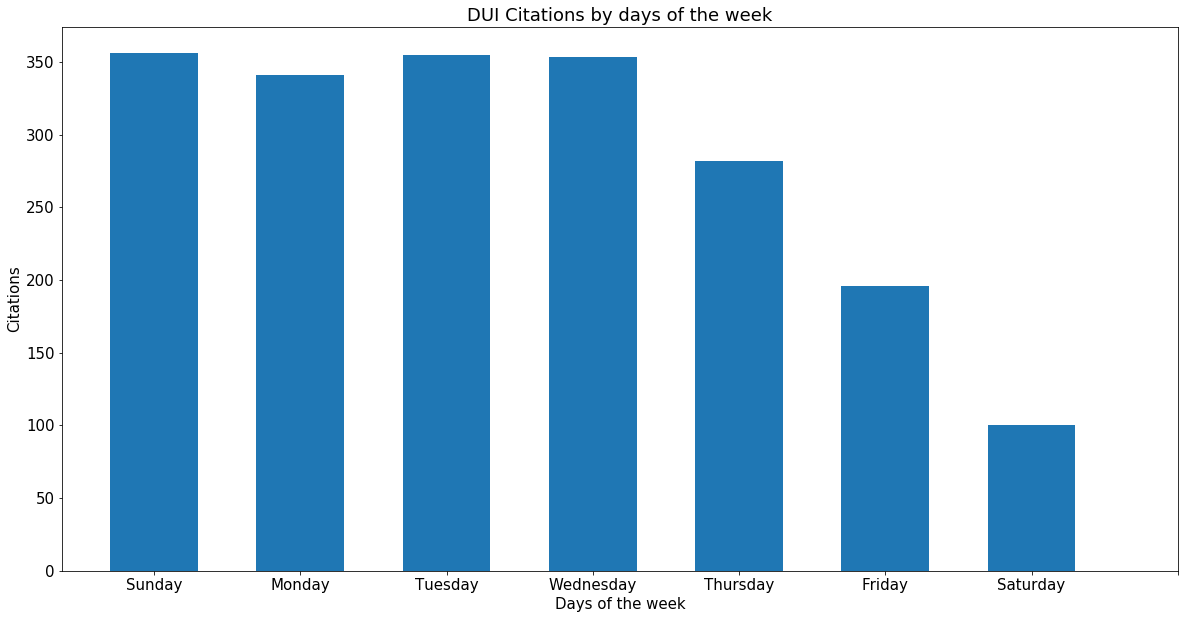

In [71]:
#concept 3
drunks = dftv[dftv['Alcohol'] == 'Yes']
dfdagg = drunks['Alcohol'].groupby(dftv['weekday']).count()  #comparing alcohol citations by weekday

dfD = pd.DataFrame(dfdagg)
dfD

fontop = {'size':15}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(20,10))
plt.rc('font',**fontop)
fig , ax = plt.subplots()

ax.bar(dfD.index,dfD['Alcohol'],width=.6)
ax.set_xlabel('Days of the week')
ax.set_title('DUI Citations by days of the week')
ax.set_xticks(np.arange(8))
ax.set_xticklabels(('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
ax.set_ylabel('Citations')

'''Friday night drivers are not drunk nationwide. Ironically, Sunday drivers are the most
intoxicated.'''


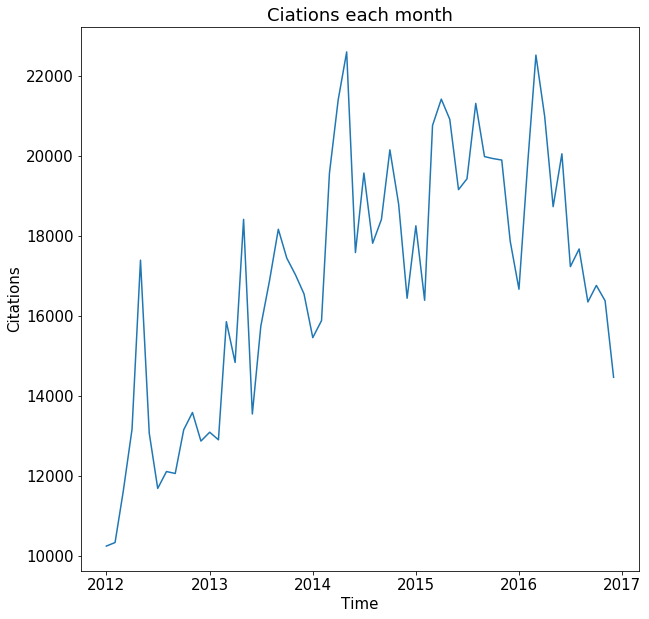

In [95]:
#concept 4
from datetime import datetime
dftime = pd.DataFrame(dftv['timestamp'],columns = ['Time'])
dftime.Time = dftv['timestamp']
dftime.Time = dftime.Time.str[0:10]
dftime['YM'] = dftime.Time.str[0:7]  #selecting only years and months part of the string from dftv.  YYYY-MM
dftime.drop(['Time'],axis = 1,inplace = True)  #drop the original column
dftv['Time'] = dftime.YM
dftagg = dftv['Accident'].groupby(dftime['YM']).count()   #the aggregation violations by months. How many violations per month

dfT = pd.DataFrame(dftagg)
dfT['inym'] = pd.to_datetime(dfT.index)  #using the datetime import to turn the index into a datetime format to graph 
dfT = dfT.set_index(dfT['inym'])         #as a time series
dfT.drop(['inym'],axis=1,inplace=True)
dfT

fontop = {'size':15}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(10,10))
plt.rc('font',**fontop)
fig,ax = plt.subplots()
ax.plot(dfT.index,dfT.Accident)
ax.set_title('Ciations each month')
ax.set_ylabel('Citations')
ax.set_xlabel('Time')

'''This graph shows the number of violations per month. From 2012 to about the 
start of 2016, traffic violations increased. Passed 2016-03, traffic violations
have been DECREASING. '''

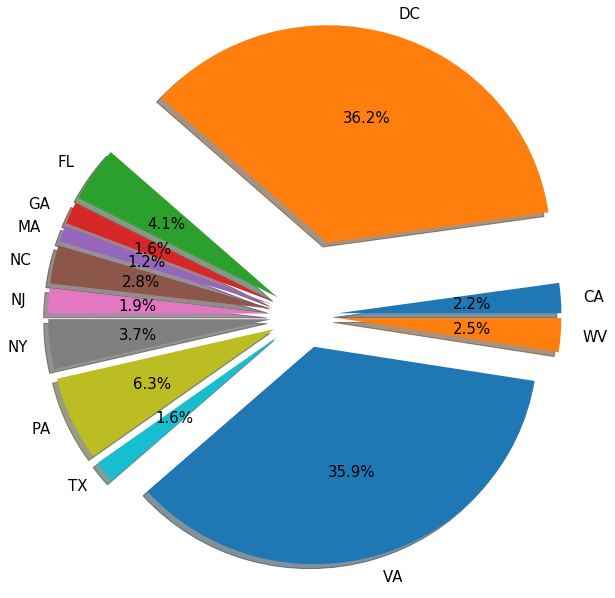

In [104]:
#concept 5

#Florida is the most dangerous state to drive in.

dfst = dftv['Accident'].groupby(dftv['Driver State']).count()   #***************************************
dfst = dfst[(dfst>1000 )&( dfst<100000)]  #getting rid of an outlier  (MD that has over 900k)
dfS = pd.DataFrame(dfst)  #converting to a dataframe

labels = list(dfS.index)
explode = []
for i in labels:
    if (i == 'DC'):
        explode.append(.35)   #making DC's slice stand out
    else:
        explode.append(0.15)  #setting the 'explode' to each slice
        
plt.figure()
plt.pie(dfS,labels=labels,
       autopct = '%1.1f%%',
        explode = explode,shadow = True,)
fontop = {'size':85}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(40,40))
plt.rc('font',**fontop)
plt.show()

'''The results show that DC is where the most violations occur. However, if you
look in the data set at the line marked with astrisks, there is an outlier.
Maryland is recorded to have over 900,000 violations. I took that outlier out and
only used those states where the violations were above 1,000 and below 100,000. '''

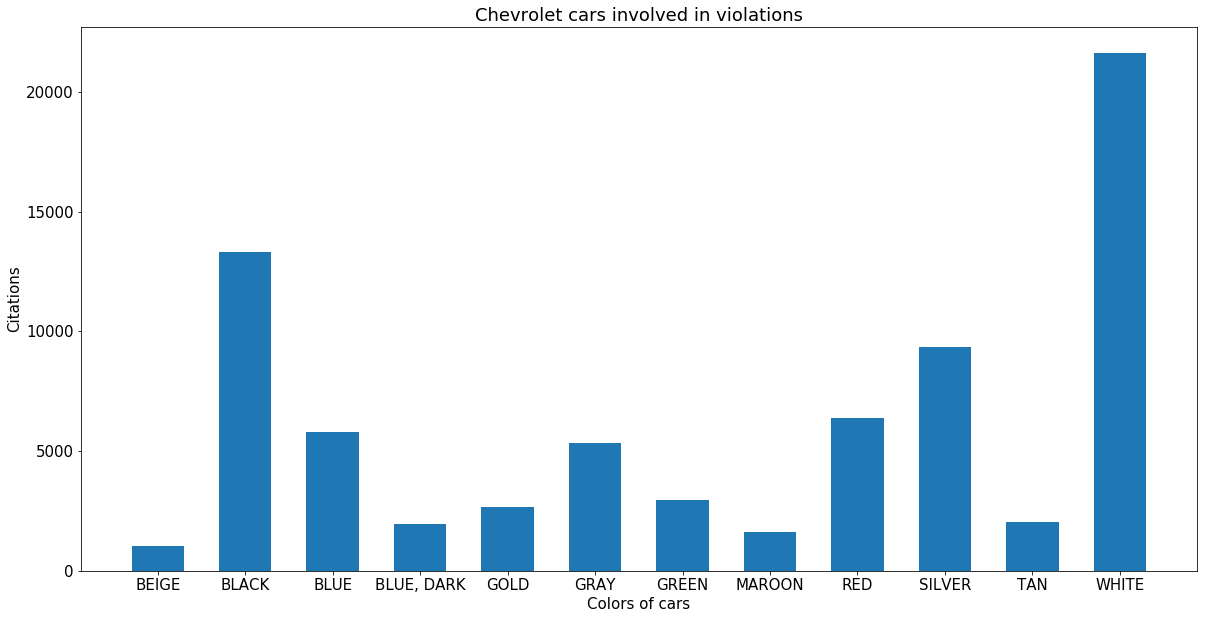

In [122]:
#concept 6 

#Chevrolet's white cars are involved in the most accidents. 

chevso = dftv[(dftv['Make'] == 'CHEVROLET')|(dftv['Make'] == 'CHEV')|(dftv['Make'] == 'CHEVY')] 
#a dataframe with only Chevrolet's  (line above)

dfch = chevso['Accident'].groupby(dftv['Color']).count()
dfch = dfch[dfch>1000]
dfch

dfC = pd.DataFrame(dfch)
dfC['Color code'] = np.arange(len(dfC.index))  #adding an x value to graph by later be changed by the corresponding index
dfC

fontop = {'size':15}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(20,10))
plt.rc('font',**fontop)
fig , ax = plt.subplots()

ax.bar(dfC['Color code'],dfC['Accident'],width=.6)  #graphing x values as chevy car color and y value citations
ax.set_xlabel('Colors of cars')
ax.set_title('Chevrolet cars involved in violations')
ax.set_xticks(np.arange(len(dfC.index)))
ax.set_xticklabels(dfC.index)
ax.set_ylabel('Citations')

'''This bar graph proves that Chevrolet's white cars are involved in the most citations
per Chevrolet cars only. Black is a close second. 
This graph may correlate to the amount of cars made by Chevy and could be
compared if the data of how many of each color of car is made by Chevy. '''